In this project, we have some pictures with some number of people. These pictures are evaluated by 2 different algorithm to count the people inside each picture. We should build a model to estimate the actual number of people, given the result of 2 algorithms and time in which each picture has taken.

# Importing libraries and data

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
dataset = pd.read_csv('Relevant.txt')
dataset.columns = ['first_algorithm', 'second_algoritm', 'day_time', 'people_count']

# Data evaluation

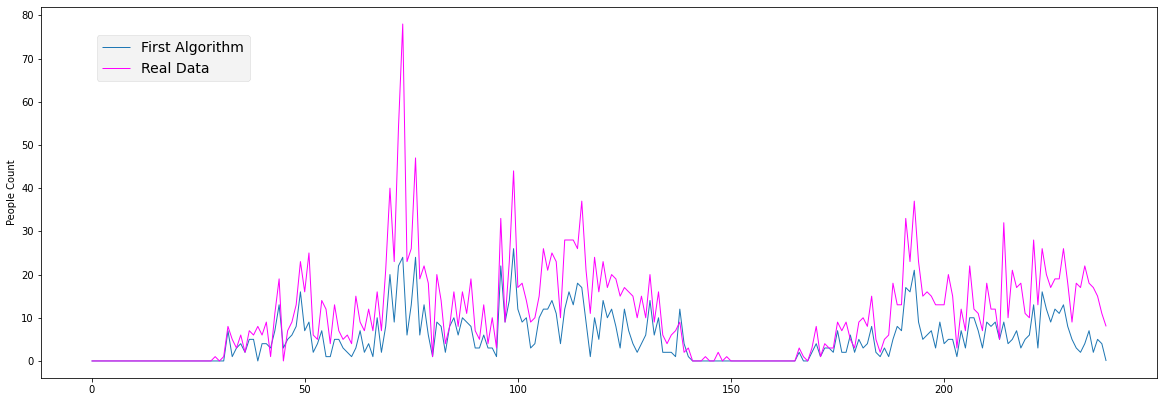

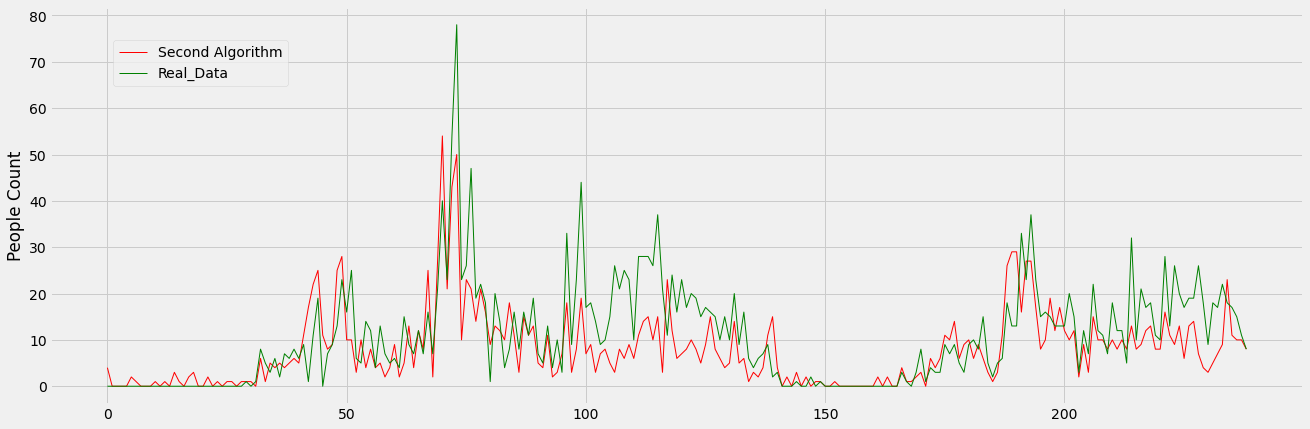

In [3]:
#Comparison of each algorithms results with real data

#Illustrate the difference of real data and first algorithm
plt.figure(figsize=(20, 15))
plt.subplot(2,1,1)
plt.style.use('fivethirtyeight')
plt.plot(dataset.index, dataset['first_algorithm'], label = 'First Algorithm', linewidth = 1)
plt.plot(dataset.index, dataset['people_count'], label = 'Real Data', c='magenta', linewidth = 1)
plt.ylabel('People Count')
plt.legend(loc =(0.05,0.8))

#Illustrate the difference of real data and second algorithm
plt.figure(figsize=(20, 15))
plt.subplot(2,1,2)
plt.style.use('fivethirtyeight')
plt.plot(dataset.index, dataset['second_algoritm'], label = 'Second Algorithm', c='red', linewidth = 1)
plt.plot(dataset.index, dataset['people_count'], label = 'Real_Data', c='green', linewidth = 1)

plt.ylabel('People Count')
plt.legend(loc =(0.05,0.8))


plt.show()

In [4]:
dataset.describe()

,first_algorithm,second_algoritm,day_time,people_count
count,239.000000,239.000000,239.000000,239.000000
mean,5.238494,8.125523,0.586987,10.895397
std,5.423806,8.251365,0.278999,10.894526
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.395000,1.000000
50%,4.000000,6.000000,0.640000,9.000000
75%,8.000000,11.000000,0.815000,17.000000
max,26.000000,54.000000,1.000000,78.000000


We can conclude that both algorithms are counting more people than the truth

# Testing different regression models

In [5]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [6]:
models = []
models_name = []
LR = LinearRegression()
KNN = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)
BRR = BayesianRidge()
DT = DecisionTreeRegressor(random_state = 0)
RF = RandomForestRegressor(n_estimators = 10, random_state = 1)
XGB = XGBRegressor(n_estimators=500, max_depth = 5,gamma = 0, objective= 'reg:pseudohubererror')
models.append(LR)
models_name.append('Linear Regression')
models.append(KNN)
models_name.append('K Nearest Neighbor')
models.append(BRR)
models_name.append('Bayesian Ridge Regressor')
models.append(DT)
models_name.append('Decision Tree Regressor')
models.append(RF)
models_name.append('Random Forest Regressor')
models.append(XGB)
models_name.append('XGBoost Regressor')

In [7]:
kfold = KFold(n_splits=10, shuffle=True)
scores = []
for i in range(len(models)):
    score = cross_val_score(models[i], X, y, cv= kfold)
    scores.append(score)
    print(models_name[i],':', round(score.mean(),3),',', round(score.std(),3))


Linear Regression : 0.796 , 0.078
K Nearest Neighbor : 0.752 , 0.092
Bayesian Ridge Regressor : 0.784 , 0.107
Decision Tree Regressor : 0.586 , 0.155
Random Forest Regressor : 0.746 , 0.07
XGBoost Regressor : 0.642 , 0.217


<function matplotlib.pyplot.show(close=None, block=None)>

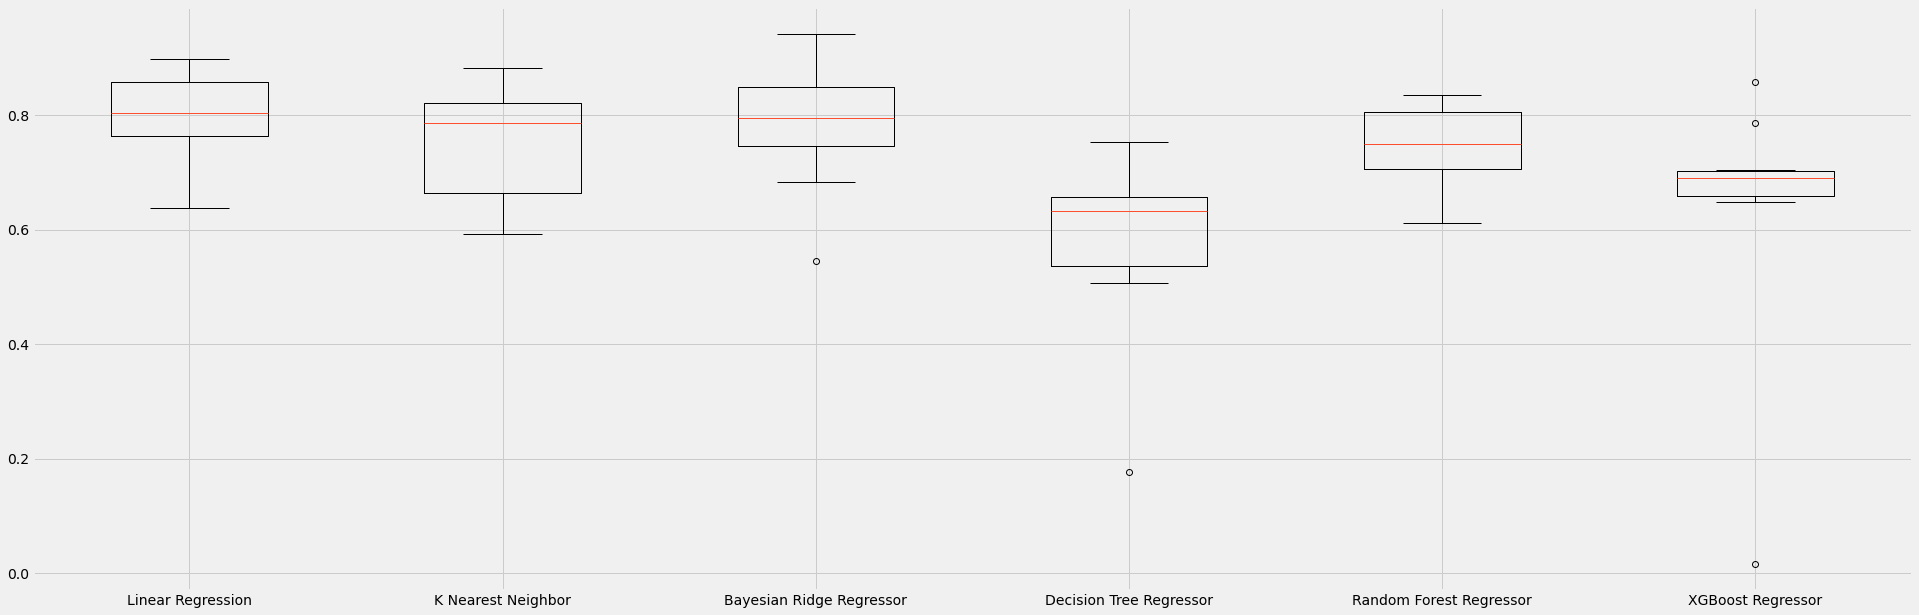

In [8]:
plt.figure(figsize=(30,10))
plt.boxplot(scores, labels = models_name)
plt.show

In [46]:
y_pred = {}
y_pred_test = {}
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(models_name[i])
    print('Train Set Score', models[i].score(X_train, y_train))
    print('Test Set Score', models[i].score(X_test, y_test))
    y_pred[models_name[i]] = models[i].predict(X)
    y_pred_test[models_name[i]] = models[i].predict(X_test)
    print('MSE', mean_squared_error(y_test, y_pred_test[models_name[i]]))

Linear Regression
Train Set Score 0.8429661194386763
Test Set Score 0.7742186544231614
MSE 25.263893819065984
K Nearest Neighbor
Train Set Score 0.8393413113993907
Test Set Score 0.7593809322477667
MSE 26.924166666666665
Bayesian Ridge Regressor
Train Set Score 0.8424018537009987
Test Set Score 0.775369186514246
MSE 25.135154571320214
Decision Tree Regressor
Train Set Score 1.0
Test Set Score 0.6226014033753933
MSE 42.229166666666664
Random Forest Regressor
Train Set Score 0.9670511396635989
Test Set Score 0.7461710504369548
MSE 28.402291666666667
XGBoost Regressor
Train Set Score 0.9998243146198732
Test Set Score 0.6078822090345253
MSE 43.87617679489417


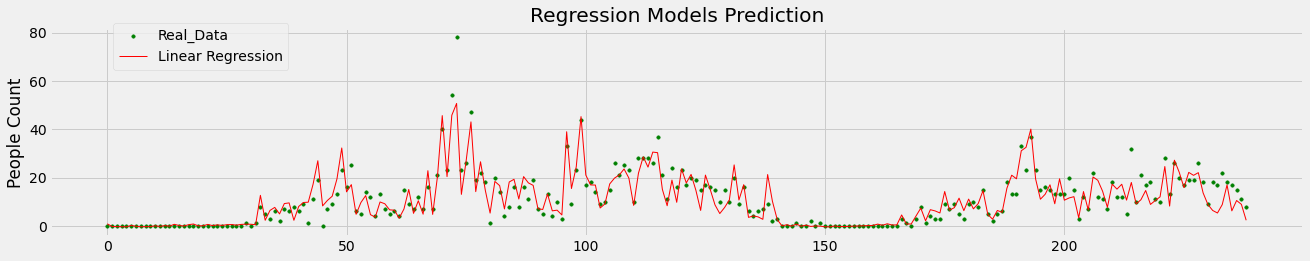

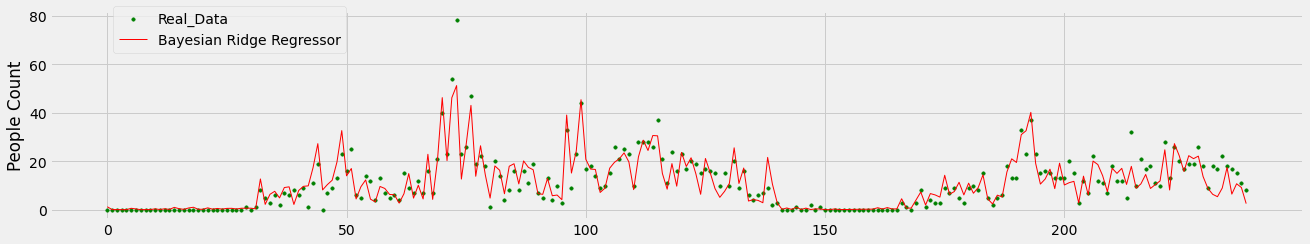

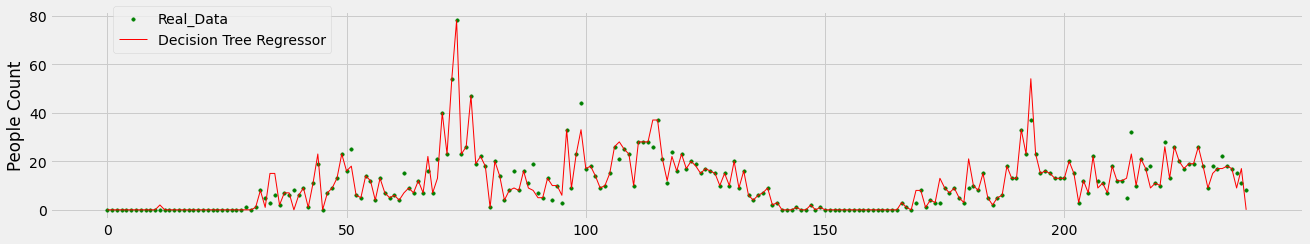

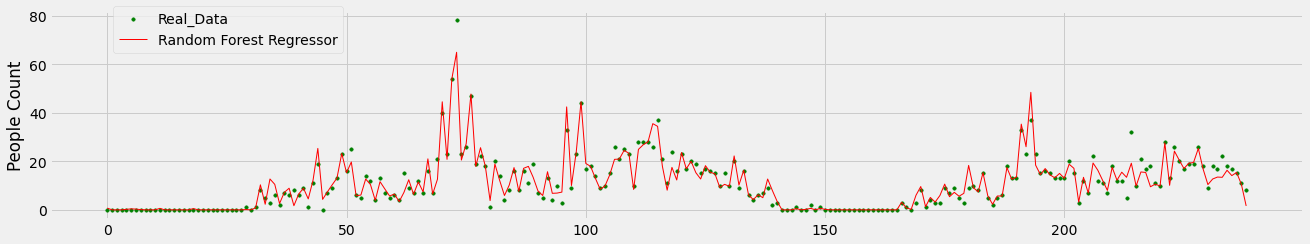

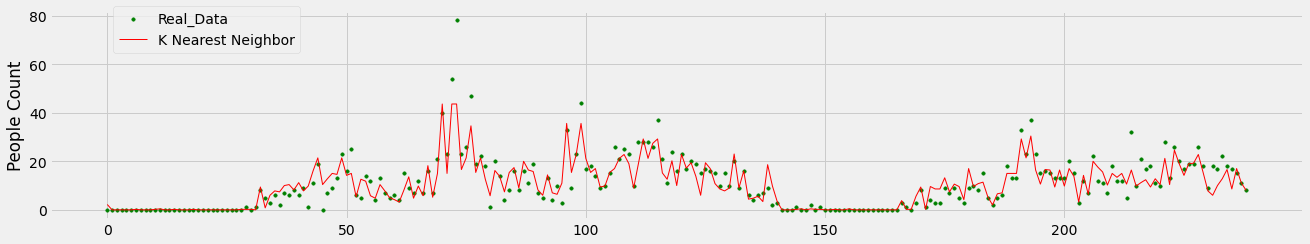

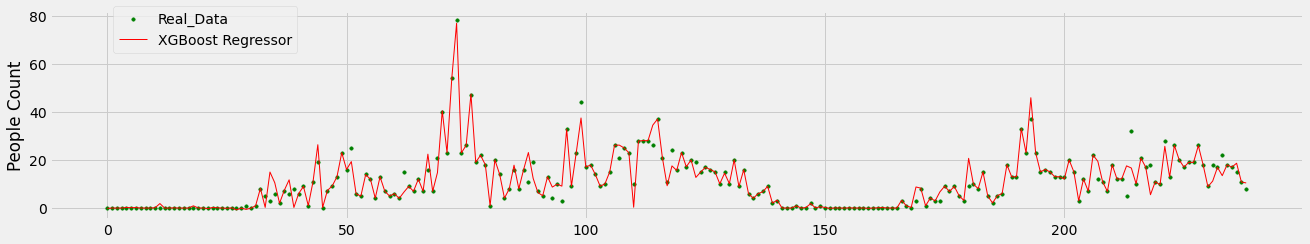

In [10]:
plt.figure(figsize=(20, 25))
plt.subplot(611)
plt.style.use('fivethirtyeight')
plt.scatter(dataset.index, dataset['people_count'], label = 'Real_Data', c='green', s = 12)
plt.plot(dataset.index, y_pred['Linear Regression'], label = 'Linear Regression', c='red', linewidth = 1)
plt.ylabel('People Count')
plt.title('Regression Models Prediction')
plt.legend(loc =(0.05,0.8))

plt.figure(figsize=(20, 25))
plt.subplot(612)
plt.style.use('fivethirtyeight')
plt.scatter(dataset.index, dataset['people_count'], label = 'Real_Data', c='green', s = 12)
plt.plot(dataset.index, y_pred['Bayesian Ridge Regressor'], label = 'Bayesian Ridge Regressor', c='red', linewidth = 1)
plt.ylabel('People Count')
plt.legend(loc =(0.05,0.8))

plt.figure(figsize=(20, 25))
plt.subplot(613)
plt.style.use('fivethirtyeight')
plt.scatter(dataset.index, dataset['people_count'], label = 'Real_Data', c='green', s = 12)
plt.plot(dataset.index, y_pred['Decision Tree Regressor'], label = 'Decision Tree Regressor', c='red', linewidth = 1)
plt.ylabel('People Count')
plt.legend(loc =(0.05,0.8))

plt.figure(figsize=(20, 25))
plt.subplot(614)
plt.style.use('fivethirtyeight')
plt.scatter(dataset.index, dataset['people_count'], label = 'Real_Data', c='green', s = 12)
plt.plot(dataset.index, y_pred['Random Forest Regressor'], label = 'Random Forest Regressor', c='red', linewidth = 1)
plt.ylabel('People Count')
plt.legend(loc =(0.05,0.8))

plt.figure(figsize=(20, 25))
plt.subplot(615)
plt.style.use('fivethirtyeight')
plt.scatter(dataset.index, dataset['people_count'], label = 'Real_Data', c='green', s = 12)
plt.plot(dataset.index, y_pred['K Nearest Neighbor'], label = 'K Nearest Neighbor', c='red', linewidth = 1)
plt.ylabel('People Count')
plt.legend(loc =(0.05,0.8))

plt.figure(figsize=(20, 25))
plt.subplot(615)
plt.style.use('fivethirtyeight')
plt.scatter(dataset.index, dataset['people_count'], label = 'Real_Data', c='green', s = 12)
plt.plot(dataset.index, y_pred['XGBoost Regressor'], label = 'XGBoost Regressor', c='red', linewidth = 1)
plt.ylabel('People Count')
plt.legend(loc =(0.05,0.8))

# Hyperparameter Tuning of 2 algorithms

In [11]:
import optuna

C:\Program Files\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
model = BRR
model.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'normalize': 'deprecated',
 'tol': 0.001,
 'verbose': False}

In [29]:
def BRR_objective(BRR_trial):
    alpha1 = BRR_trial.suggest_float('alpha_1', 1e-06, 1000)
    lambda1 = BRR_trial.suggest_float('lambda_1', 1e-06, 1000)
    alpha2 = BRR_trial.suggest_float('alpha_2', 1e-06, 1000)
    lambda2 = BRR_trial.suggest_float('lambda_2', 1e-06, 1000)
    iter_count = BRR_trial.suggest_int('n_iter', 300, 1000)
    model = BayesianRidge(alpha_1= alpha1, lambda_1= lambda1, alpha_2= alpha2, lambda_2= lambda2, n_iter= iter_count)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return(model.score(X_test, y_test))


BRR_study = optuna.create_study(direction='maximize')
BRR_study.optimize(BRR_objective, n_trials= 100, n_jobs=-1)
BRR_trial = BRR_study.best_trial

print('Accuracy: {}'.format(BRR_trial.value))
print("Best hyperparameters: {}".format(BRR_trial.params))

[I 2022-06-29 10:23:12,504] A new study created in memory with name: no-name-cf086441-a135-4a17-a19c-bca7c2fe8fa1
C:\Program Files\Python310\lib\site-packages\optuna\study\study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(
[I 2022-06-29 10:23:12,517] Trial 0 finished with value: 0.7855727504124906 and parameters: {'alpha_1': 161.81158141499697, 'lambda_1': 223.72769244443896, 'alpha_2': 66.12623220032333, 'lambda_2': 2.1621560791189927, 'n_iter': 552}. Best is trial 0 with value: 0.7855727504124906.
[I 2022-06-29 10:23:12,529] Trial 1 finished with value: 0.7749526596394408 and parameters: {'alpha_1': 896.1382058206923, 'lambda_1': 314.2885741556652, 'alpha_2': 622.8444342329606, 'lambda_2': 104.19732740076428, 'n_iter': 860}. Best is trial 0 with value: 0.7855727504124906.
[I 2022-06-29 10:23:12,547] Trial 2 finished with value: 0.77434448340935

Accuracy: 0.7856363888297928
Best hyperparameters: {'alpha_1': 186.88584207922622, 'lambda_1': 314.0464923182163, 'alpha_2': 879.4172580179313, 'lambda_2': 4.282303114681018, 'n_iter': 705}


In [30]:
model = BayesianRidge(alpha_1= BRR_trial.params['alpha_1'],
                      alpha_2= BRR_trial.params['alpha_2'],
                      lambda_1= BRR_trial.params['lambda_1'],
                      lambda_2= BRR_trial.params['lambda_2'],
                      n_iter= BRR_trial.params['n_iter'])
model.fit(X_train, y_train)
print('Train Set Score', round(model.score(X_train, y_train), 4))
print('Test Set Score', round(model.score(X_test, y_test), 4))

Y_pred = model.predict(X_test)
print('MSE', round(mean_squared_error(y_test, Y_pred),4))


Train Set Score 0.834
Test Set Score 0.7856
MSE 23.9863


Due to slight change of the BRR model, I decide to tune hyperparameters of XGB model, with the hope of getting a better accuracy.

In [17]:
model = XGB
model.get_params()

{'objective': 'reg:pseudohubererror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 5,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 500,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [49]:
def XGB_objective(XGB_trial):
    max_depth = XGB_trial.suggest_int('max_depth', 2,20)
    min_child_weight = XGB_trial.suggest_int('min_child_weight', 1, 100)
    reg_alpha = XGB_trial.suggest_float('reg_alpha', 0, 10)
    reg_lambda = XGB_trial.suggest_float('reg_lambda', 1, 10)
    n_estimator = XGB_trial.suggest_int('n_estimator', 20, 1000)
    model = XGBRegressor(max_depth= max_depth, min_child_weight= min_child_weight,
                         reg_alpha= reg_alpha, reg_lambda= reg_lambda,
                         n_estimators= n_estimator, objective= 'reg:pseudohubererror')
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred[y_pred>50] = 50
    return(mean_squared_error(y_test, y_pred))

XGB_study = optuna.create_study(direction='minimize')
XGB_study.optimize(XGB_objective, n_trials= 100, n_jobs=-1)
XGB_trial = XGB_study.best_trial

print('MSE: {}'.format(XGB_trial.value))
print("Best hyperparameters: {}".format(XGB_trial.params))

[I 2022-06-29 10:46:55,427] A new study created in memory with name: no-name-ceaaaf31-0430-4d0d-95d0-d39d1098464e
C:\Program Files\Python310\lib\site-packages\optuna\study\study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(
[I 2022-06-29 10:46:55,766] Trial 7 finished with value: 243.66666666666666 and parameters: {'max_depth': 6, 'min_child_weight': 94, 'reg_alpha': 9.962447253407069, 'reg_lambda': 9.587003474275438, 'n_estimator': 378}. Best is trial 7 with value: 243.66666666666666.
[I 2022-06-29 10:46:55,868] Trial 1 finished with value: 226.69753914404592 and parameters: {'max_depth': 16, 'min_child_weight': 28, 'reg_alpha': 4.379425863649629, 'reg_lambda': 6.626419332416085, 'n_estimator': 507}. Best is trial 1 with value: 226.69753914404592.
[I 2022-06-29 10:46:55,904] Trial 5 finished with value: 224.80383423007729 and parameters: {'max_de

MSE: 27.60762549390252
Best hyperparameters: {'max_depth': 10, 'min_child_weight': 2, 'reg_alpha': 1.9731444644461549, 'reg_lambda': 9.975269367666655, 'n_estimator': 895}


In [50]:
model = XGBRegressor(max_depth= XGB_trial.params['max_depth'],
                    min_child_weight= XGB_trial.params['min_child_weight'],
                    reg_alpha= XGB_trial.params['reg_alpha'],
                    reg_lambda= XGB_trial.params['reg_lambda'],
                    n_estimators= XGB_trial.params['n_estimator'],
                    objective= 'reg:pseudohubererror')

model.fit(X_train, y_train)
print('Train Set Score', round(model.score(X_train, y_train), 4))
print('Test Set Score', round(model.score(X_test, y_test), 4))

Y_pred = model.predict(X_test)
print('MSE', round(mean_squared_error(y_test, Y_pred),4))

Train Set Score 0.8374
Test Set Score 0.7533
MSE 27.6076
